#### 1. Design Effectiveness

Randomization

Objective: Ensure that clients were randomly assigned to either the Test or Control group to eliminate biases.

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# impprt the dataset

df_merged = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/df_merged_final.csv')

df_merged.sample(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
65185,2165031,5,69,57,U,2,33847.85,1,4,Test,844227914_17634311882,471828611_69290180743_421416,step_1,2017-03-22 16:41:42
260069,3553475,5,66,22,F,2,29572.80,6,9,Control,288165375_63166009079,506896915_65214180844_418533,start,2017-05-24 11:12:54
175351,8318184,4,58,37,U,2,30659.66,5,8,Test,563591100_1325354632,636949052_73998847170_514114,start,2017-05-03 01:05:34
2289,9591707,11,140,49,M,2,34721.08,3,6,Control,549400796_89276166338,567752424_35875494806_473083,step_1,2017-05-22 11:45:57
175589,2216021,5,65,22,U,2,42401.70,5,8,Test,498917021_33483028445,400662688_97301587003_155199,step_2,2017-04-16 07:23:54


In [3]:
from scipy.stats import ttest_ind, chi2_contingency

# Prepare the dataset for analysis
df_merged['date_time'] = pd.to_datetime(df_merged['date_time'])

# Check the distribution of key variables between the Test and Control groups
test_group_merged = df_merged[df_merged['variation'] == 'Test']
control_group_merged = df_merged[df_merged['variation'] == 'Control']

# Summary statistics for key variables in the merged dataset
summary_test_merged = test_group_merged.describe(include='all')
summary_control_merged = control_group_merged.describe(include='all')

# Display summary statistics
print("Test Group Summary Statistics (Merged Dataset):")
print(summary_test_merged)
print("\nControl Group Summary Statistics (Merged Dataset):")
print(summary_control_merged)

# Statistical tests for equivalence in the merged dataset
# Continuous variables (e.g., balance, age, tenure) in the merged dataset
continuous_vars_merged = ['balance', 'clnt_age', 'clnt_tenure_yr', 'clnt_tenure_mnth']
t_tests_merged = {var: ttest_ind(test_group_merged[var], control_group_merged[var]) for var in continuous_vars_merged}

# Categorical variables (e.g., gender) in the merged dataset
categorical_vars_merged = ['gender']
chi2_tests_merged = {var: chi2_contingency(pd.crosstab(df_merged[var], df_merged['variation'])) for var in categorical_vars_merged}

print("\nT-Tests for Continuous Variables:")
print(t_tests_merged)
print("\nChi2 Tests for Categorical Variables:")
print(chi2_tests_merged)

Test Group Summary Statistics (Merged Dataset):
           client_id  clnt_tenure_yr  clnt_tenure_mnth       clnt_age  gender  \
count   1.766410e+05   176641.000000     176641.000000  176641.000000  176641   
unique           NaN             NaN               NaN            NaN       3   
top              NaN             NaN               NaN            NaN       M   
freq             NaN             NaN               NaN            NaN   59288   
mean    5.007069e+06       12.182025        152.227410      48.419512     NaN   
min     5.550000e+02        2.000000         33.000000      17.000000     NaN   
25%     2.508516e+06        6.000000         82.000000      35.000000     NaN   
50%     5.061874e+06       11.000000        138.000000      50.000000     NaN   
75%     7.475920e+06       16.000000        193.000000      61.000000     NaN   
max     9.999832e+06       55.000000        669.000000      96.000000     NaN   
std     2.879062e+06        6.940522         82.955476      1

In [4]:
# Verify implementation consistency in the merged dataset
implementation_check_merged = df_merged.groupby('client_id')['variation'].nunique()
inconsistent_implementation_merged = implementation_check_merged[implementation_check_merged > 1]

# Display inconsistent implementations if any
print("Inconsistent Implementations (if any):")
print(inconsistent_implementation_merged)

Inconsistent Implementations (if any):
Series([], Name: variation, dtype: int64)


### 2. Duration

Time Frame

- Objective: Ensure that the experiment duration (from 3/15/2017 to 6/20/2017) is adequate to gather meaningful data.

In [5]:
# Check the time frame coverage in the merged dataset
date_coverage_merged = df_merged['date_time'].agg(['min', 'max'])

# Analyze the distribution of interactions over time in the merged dataset
interaction_distribution_merged = df_merged['date_time'].value_counts().sort_index()

print("Interaction Distribution Over Time (Merged Dataset):")
print(interaction_distribution_merged)

# Display date coverage
print("\nDate Coverage (Merged Dataset):")
print(date_coverage_merged)

Interaction Distribution Over Time (Merged Dataset):
date_time
2017-03-15 00:19:28    1
2017-03-15 00:20:50    1
2017-03-15 00:22:52    1
2017-03-15 00:23:47    1
2017-03-15 00:26:24    1
                      ..
2017-06-20 23:21:41    1
2017-06-20 23:26:00    1
2017-06-20 23:56:17    1
2017-06-20 23:56:30    1
2017-06-20 23:57:06    1
Name: count, Length: 283253, dtype: int64

Date Coverage (Merged Dataset):
min   2017-03-15 00:19:28
max   2017-06-20 23:57:06
Name: date_time, dtype: datetime64[ns]


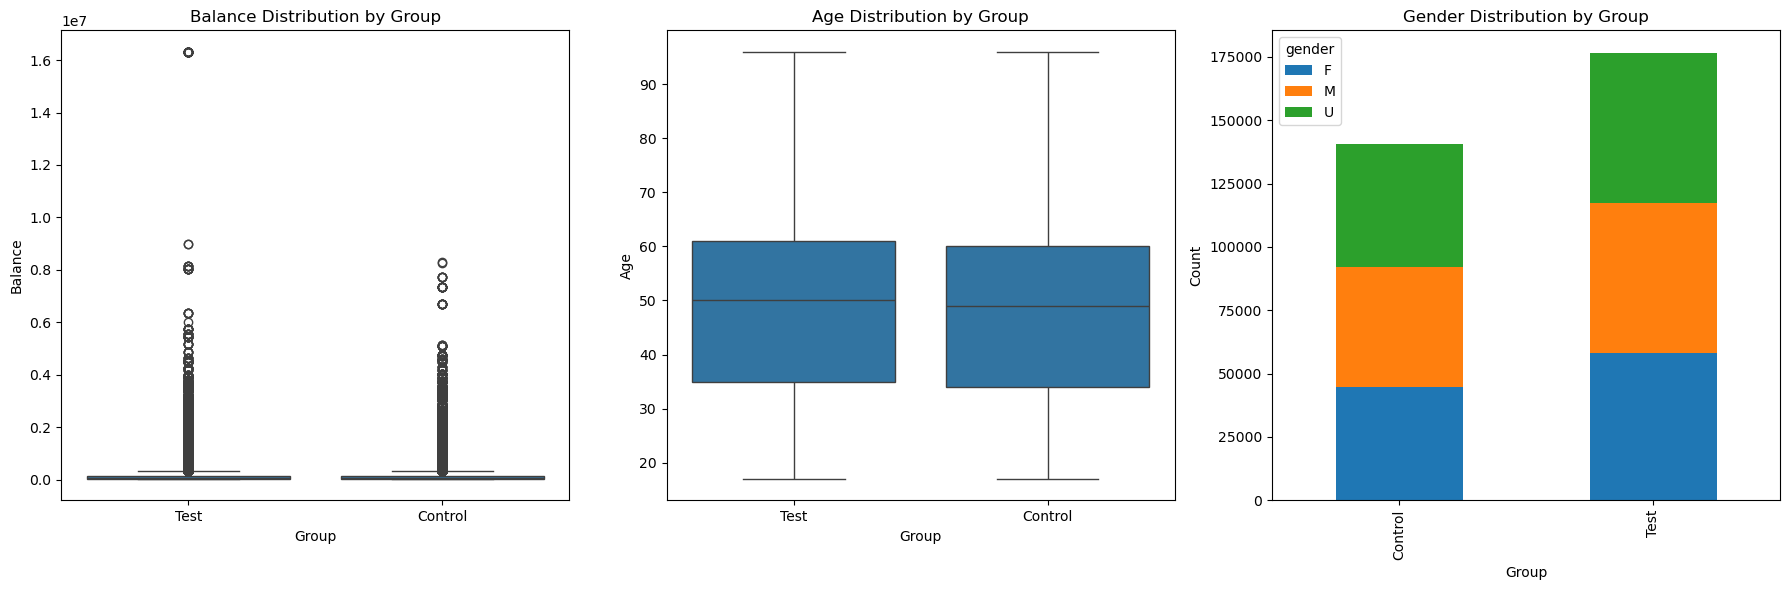

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Box Plot for Balance
plt.subplot(1, 3, 1)
sns.boxplot(x='variation', y='balance', data=df_merged)
plt.title('Balance Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Balance')

# Box Plot for Age
plt.subplot(1, 3, 2)
sns.boxplot(x='variation', y='clnt_age', data=df_merged)
plt.title('Age Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Age')

# Bar Plot for Gender Distribution
plt.subplot(1, 3, 3)
gender_counts = df_merged.groupby(['variation', 'gender']).size().unstack()
gender_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Gender Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

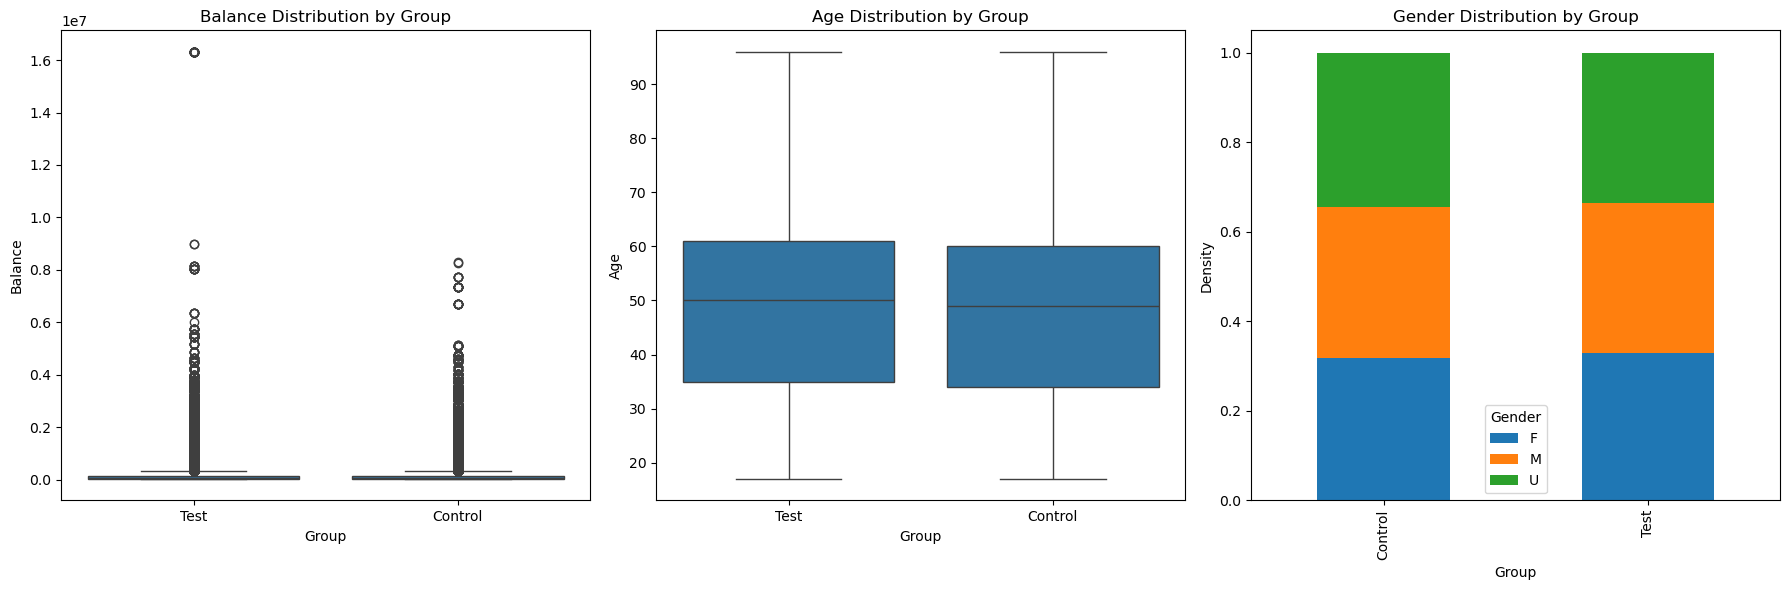

Mean Balance (Test Group): 162323.09
Mean Balance (Control Group): 158890.55
Mean Age (Test Group): 48.4
Mean Age (Control Group): 48.0


In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Box Plot for Balance
plt.subplot(1, 3, 1)
sns.boxplot(x='variation', y='balance', data=df_merged)
plt.title('Balance Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Balance')

# Box Plot for Age
plt.subplot(1, 3, 2)
sns.boxplot(x='variation', y='clnt_age', data=df_merged)
plt.title('Age Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Age')

# Density Plot for Gender Distribution
plt.subplot(1, 3, 3)
gender_counts = df_merged.groupby(['variation', 'gender']).size().unstack().fillna(0)
gender_counts = gender_counts.divide(gender_counts.sum(axis=1), axis=0)  # Normalize to density
gender_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Gender Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Density')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()


# Display mean values for Balance and Age
mean_balance_test = df_merged[df_merged['variation'] == 'Test']['balance'].mean().round(2)
mean_balance_control = df_merged[df_merged['variation'] == 'Control']['balance'].mean().round(2)
mean_age_test = df_merged[df_merged['variation'] == 'Test']['clnt_age'].mean().round(1)
mean_age_control = df_merged[df_merged['variation'] == 'Control']['clnt_age'].mean().round(1)

print(f"Mean Balance (Test Group): {mean_balance_test}")
print(f"Mean Balance (Control Group): {mean_balance_control}")
print(f"Mean Age (Test Group): {mean_age_test}")
print(f"Mean Age (Control Group): {mean_age_control}")

### Randomization and Equivalence:

#### **Summary Statistics:**

Test Group:

- Number of Clients: 176,641
- Average Tenure (Years): 12.18
- Average Age: 48.42
- Average Balance: $162,323.10
- Gender Distribution: 59,288 (M), 48,438 (U)

Control Group:

- Number of Clients: 140,482
- Average Tenure (Years): 12.17
- Average Age: 48.01
- Average Balance: $158,890.50
- Gender Distribution: 45,538 (M), 48,438 (U)

#### **Statistical Tests:**

Balance:

- P-value: 0.00485 (Statistically significant difference)

Age:

- P-value: 2.13e-13 (Statistically significant difference)

Tenure (Years):

- P-value: 0.567 (No significant difference)

Tenure (Months):

- P-value: 0.456 (No significant difference)

- Gender:

P-value: 9.70e-13 (Statistically significant difference)


In [9]:
import statsmodels.stats.power as smp

# Split the data into Test and Control groups
test_group = df_merged[df_merged['variation'] == 'Test']['balance']
control_group = df_merged[df_merged['variation'] == 'Control']['balance']

# Calculate the means and standard deviations
mean_test = np.mean(test_group)
mean_control = np.mean(control_group)
std_test = np.std(test_group, ddof=1)
std_control = np.std(control_group, ddof=1)

# Calculate pooled standard deviation
pooled_std = np.sqrt(((std_test**2 + std_control**2) / 2))

# Calculate Cohen's d
effect_size = (mean_test - mean_control) / pooled_std
print(f"Effect Size (Cohen's d): {effect_size:.4f}")

# Define the parameters for the power analysis
alpha = 0.05       # Significance level
power = 0.80       # Desired power
ratio = 1          # Ratio of sample sizes (Test group to Control group)

# Calculate the required sample size
sample_size = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print(f"Required sample size per group: {sample_size:.2f}")

# Compare with the actual sample sizes
actual_sample_size_test = len(test_group)
actual_sample_size_control = len(control_group)
print(f"Actual sample size (Test group): {actual_sample_size_test}")
print(f"Actual sample size (Control group): {actual_sample_size_control}")

Effect Size (Cohen's d): 0.0102
Required sample size per group: 151450.29
Actual sample size (Test group): 176641
Actual sample size (Control group): 140482


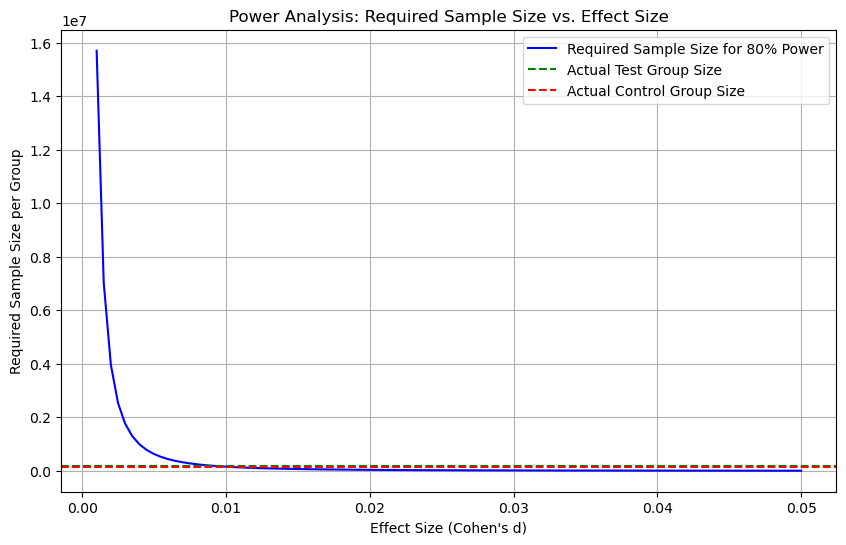

In [10]:
# Define a range of effect sizes
effect_sizes = np.linspace(0.001, 0.05, 100)

# Calculate required sample sizes for each effect size
required_sample_sizes = [smp.tt_ind_solve_power(effect_size=es, alpha=0.05, power=0.80, ratio=1) for es in effect_sizes]

# Plot the power curve
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, required_sample_sizes, label='Required Sample Size for 80% Power', color='blue')
plt.axhline(y=176641, color='green', linestyle='--', label='Actual Test Group Size')
plt.axhline(y=140482, color='red', linestyle='--', label='Actual Control Group Size')
plt.xlabel('Effect Size (Cohen\'s d)')
plt.ylabel('Required Sample Size per Group')
plt.title('Power Analysis: Required Sample Size vs. Effect Size')
plt.legend()
plt.grid(True)
plt.show()